<font color="#040abf"><h1 align="left">Motor de predicción de bajas</h1></font>
<h3 align="left">Objetivo</h3></font>

El objetivo es entrenar un modelo que prediga las bajas de clientes

## Planteamiento del problema

Tenemos un conjunto de datos de clientes de una aseguradora que vienen por lotes **TODO(confirmar)** mensuales . En cada lote viene la información de las pólizas que van a finalizar a tres meses vista, indicándose si se renuevan o no.
El objetivo es entrenar con los datos que se poseen un modelo que sea capaz de recibir los datos de un mes, y predicir qué pólizas están en riesgo de no ser renovadas. 

Esto permite a la compañía tener tres meses de antelación para realizar campañas de retención o lo que se considere necesario.

## Conjunto de datos

El conjunto de datos es información real de clientes de una aseguradora. Los campos son los siguientes

* **ID_CIERRE**;Integer(11);Mes de actualización de los datos
* **ANIO_CARTERA**;Numeric(4);Año de efecto de las pólizas a renovar. Cartera que se lanza a renovación
* **MES_CARTERA**;Decimal(6);Mes de efecto de las pólizas a renovar. Cartera que se lanza a renovación
* **NUM_LOTE_CARTERA**;Decimal(6);Nº de origen del Lote de la Cartera que se ha lanzado
* **TIPO_OPERACION**;VarChar(10);Tipo de operación que corresponde con el suplemento de la póliza
* **IND_CARTERA**;Integer(1);Sumatorio de pólizas que se lanzan dentro del lote de cartera
* <font color="red">**FLG_RENUEVA**;Integer(1);**Target a Predecir**.</font> Flag que indica que la póliza se ha renovado o se ha dado de baja (0)
* **COD_POLIZA**;Decimal(9);Identificador de la póliza
* **FLG_POLIZA_COLECTIVA**;Decimal(1);Flag que indica si la póliza a renovar pertenece a una flota de automóvil o no
* **COD_TIPO_POLIZA**;Char(1);Tipo de Póliza. Anual, Semestral, Temporal
* **DES_FORMA_CONTRATA**;VarChar(30) nullable;Tipo de Póliza. Anual, Semestral, Temporal
* **COD_FORMA_PAGO**;Char(1);Forma de Pago. Anual, semestral
* **DES_FORMA_PAGO**;VarChar(30) nullable;Forma de Pago. Anual, semestral
* **COD_MODO_PAGO**;Char(1);Modo de Pago, Banco, caja, transferencia, etc.
* **DES_MODO_PAGO**;VarChar(30) nullable;Modo de Pago, Banco, caja, transferencia, etc.
* **COD_BANCO**;Decimal(4);identificador del Banco
* **DES_BANCO**;VarChar(40) nullable;identificador del Banco
* **NUM_SUPLEMENTO_REGULADOR**;Decimal(4);Nº de suplemento con el que la póliza entra en el regulador
* **NUM_SUPLEMENTO**;Decimal(4);Último Nº de suplemento de la póliza en el periodo de análisis
* **FEC_ALTA_POLIZA**;Decimal(8);Fecha de alta de póliza
* **FEC_EFECTO_POLIZA**;Decimal(8);fecha de efecto de la póliza. fecha de inicio de la cobertura
* **FEC_VCTO_POLIZA**;Decimal(8);Fecha de vencimiento de la cobertura de la póliza
* **FEC_BAJA_POLIZA**;Decimal(8);Fecha de baja de la póliza. fecha a partir de la cual ya no se cubre el siniestro
* **FEC_GRABACION_BAJA**;Date(8);Fecha de grabación de la Póliza
* **COD_CAUSA_ANULACION**;Char(2);Causa de la anulación
* **DES_CAUSA_ANULACION**;VarChar(30) nullable;Descripción de la causa de anulación
* **COD_MODALIDAD_ANT**;VarChar(2);Modalidad de la anualidad anterior
* **COD_MODALIDAD_REG**;VarChar(2);Modalidad con el que la póliza entra al regulador
* **COD_MODALIDAD_ACT**;VarChar(2);Modalidad que corresponde con el último suplemento
* **VAL_MUT_G**;VarChar(5);Valoración de Mutualista Global
* **VAL_MUT_5**;VarChar(5);Valoración de Mutualista últimos 5 años
* **VAL_MUT_1**;VarChar(5);Valoración de Mutualista últimos 1 año
* **NUM_POLIZAS**;Integer(1);Número de Pólizas que tiene el mutualistas
* **NUM_ANTIGUEDAD_POLIZA**;Decimal(6,2);Antigüedad de la Póliza en Años
* **NUM_ANTI_MUTUALISTA**;Decimal(6,2);Antigüedad del mutualista en la compañía en Años
* **EDAD**;Decimal(6,2);Edad del cliente en Años
* **NUM_ANTI_CARNET**;Decimal(6,2);Antigüedad del carnet del mutualista en la compañía en Años
* **FLG_CONDUCTOR_HAB**;VarChar(1);Flag que indica so el cliente es conductor habitual
* **NUM_CONDUCTORES**;Decimal(1);Número de Conductores dados de alta en la póliza
* **COD_PROVINCIA**;Numeric(2);Código de la provincia del cliente
* **COD_ZONA_TARIFA**;Char(1);zona de tarifa de circulación del auto
* **NOTABUREAU**;Char(1);Clasificación del mutualista por Bureau
* **NOTAGLOBAL**;Char(1);Clasificación del mutualista por Experiam
* **NOTA_FACTOR_EXPERIAN**;VarChar(2) nullable;Nota Bureau. Concatenación de las dos notas a partir de la cual se obtiene el porcentaje de recargo o de descuento a aplicar
* **FACTOR_EXPERIAN**;Decimal(5,3) nullable;Porcentaje de descuento o de recargo obtenido a consultar a experiam por las notas global y bureau
* **IMP_ANUALIDAD_ANTERIOR**;Decimal(11,2) nullable;Importe de la póliza en la anualidad anterior
* **IMP_PRIMA_TARIFICADOR_RENOVACION**;Decimal(11,2) nullable;Importe de la póliza al salir del tarificador
* **COD_REGULADOR**;Char(2);Código de regulador a aplicar
* **PORC_REGULADOR**;Decimal(11,2);Porcentaje de descuento o recargo que ha aplicado el regulador sobre la prima de la póliza
* **IMP_DIFERENCIA**;Decimal(31,2);Importe de la diferencia entre la anualidad anterior y la salida del regulador
* **IMP_PRIMA_RENOV_FINAL**;Decimal(31,2) nullable;Importe de la prima con la que finalmente renueva la póliza. Puede ser distinta de la del regulador en función si ha hecho un nuevo suplemento
* **NUM_BONUS_ANTERIOR**;Decimal(6,2);Porcentaje de descuento aplicado en la anualidad anterior
* **NUM_BONUS_ACTUAL**;Decimal(6,2);Porcentaje de descuento aplicado en la anualidad actual
* **ID_TRAMO_BONUS**;Decimal(1);Diferencia entre el bonos actual y el bonus anterior
* **DES_TRAMO_BONUS**;VarChar(200);Diferencia entre el bonus actual y el bonus anterior
* **COD_OFICINA_GESTORA**;Decimal(5);Oficina gestora de la póliza. Donde se gestiona el riesgo
* **DESC_OFICINA_GESTORA**;VarChar(270) nullable;Oficina gestora de la póliza. Donde se gestiona el riesgo
* **COD_OFICINA_ABRIDORA**;Decimal(5);oficina que ha vendido la póliza
* **DESC_OFICINA_ABRIDORA**;VarChar(270) nullable;oficina que ha vendido la póliza
* **COD_AGENTE**;Decimal(5);Agente que ha vendido la póliza
* **COD_TIPO_CLIENTE**;Char(1);Tipo de cliente
* **DES_TIPO_CLIENTE**;VarChar(200) nullable;Descripción del tipo de cliente
* **COD_PROFESION**;Decimal(3);Profesión del Cliente
* **ID_REL_PROFESION**;Decimal(2);Profesión Sanitaria / No Sanitaria
* **DESC_TITULACION**;VarChar(34) nullable;Titulación del profesional
* **DESC_PROFESION**;VarChar(207) nullable;Descripción de la profesión del cliente
* **TOT_SINIESTROS**;Decimal(5);Número total de siniestro que ha tenido en la vida de la póliza
* **GASTO_TOTAL**;Decimal(17,2);Coste siniestral total de siniestro que ha tenido en la vida de la póliza
* **SINISESTROS_ACTUAL**;Decimal(5);Número de siniestro que ha tenido en la última anualidad
* **GASTO_TOTAL_ACTUAL**;Decimal(17,2);Coste siniestra de la última anualidad
* **COD_TIPO_SINIESTRO**;Integer(1);Tipo de siniestro
* **DES_TIPO_SINIESTRO**;VarChar(200);Descripción de la agrupación de tipos de siniestros
* **NUM_SINIESTRO**;Integer(10) nullable;Número de siniestros
* **NUM_SINIESTRO_DESF**;Integer(10) nullable;Número de siniestros desfavorables
* **NUM_SINIESTRO_FAV**;Integer(10) nullable;Número de siniestros favorables
* **SEXO_COND_PRINCIPAL**;VarChar(1) nullable;Sexo del conductor principal
* **FEC_NAC_COND_PRINCIPAL**;Decimal(11) nullable;Fecha de nacimiento del conductor principal
* **FEC_CARNET_COND_PRINCIPAL**;Decimal(11) nullable;Fecha de carnet del conductor principal
* **COD_POSTAL_COND_PRINCIPAL**;Decimal(5) nullable;Código postal del conductor principal
* **SEXO_COND_HABITUAL**;VarChar(1) nullable;Sexo del conductor habitual
* **FEC_NAC_COND_HABITUAL**;Decimal(11) nullable;Fecha de nacimiento del conductor Habitual
* **FEC_CARNET_COND_HABITUAL**;Decimal(11) nullable;Fecha de carnet del conductor habitual
* **COD_POSTAL_COND_HABITUAL**;Decimal(5) nullable;Código postal del conductor principal
* **COD_TIPO_VEHICULO**;Char(3);código del tipo de vehículo
* **DESC_TIPO_VEHICULO**;VarChar(200);Descripción del tipo de vehículo
* **COD_VEHICULO**;Numeric(9);código del vehículo
* **NUM_ANTI_MATRICULA**;Decimal(6,2);Antigüedad de matrícula en años
* **COD_GRUPO_TARIFA**;Numeric(2);Grupo de Tarificación
* **DESC_GRUPO_TARIFICACION**;VarChar(50);Descripción del grupo de tarificación de la póliza
* **COD_REMOLQUE**;Char(2);Flag si el vehículo tiene remolque
* **NUM_POTENCIA_VEHICULO**;Decimal(3);Potencia del vehículo
* **DESC_MARCA**;Char(15);Marca del vehículo
* **DESC_MODELO_VERSION**;Char(40);Modelo del vehículo
* **COD_COMBUSTIBLE**;Char(1);Tipo de Combustible
* **NUM_PUERTAS**;Char(2);Número de Puertas
* **IMP_VALOR_VEHICULO**;Decimal(11,2);Importe del Vehículo Inicial
* **FLG_BUEN_MUTUALISTA**;VarChar(256);Flag que indica si la póliza tiene descuento por Buen Mutualista
* **FLG_VEHICULO_NUEVO**;VarChar(256);Flag que indica si la póliza tiene descuento por Vehículo nuevo
* **FLG_RECARGO_CONDUCTOR_RCO**;Decimal(1);Flag de recargo por Conductor
* **FLG_RECARGO_CONDUCTOR_DANOS**;Decimal(1);Flag de recargo por Conductor Daños
* **IMPORTE_TOTAL_DESCUENTO**;Decimal(31,2);Suma de todos los descuentos que se han aplicado sobre la póliza
* **IMP_DESC_EMPLEADOS_TOTAL**;Decimal(31,3) nullable;Suma de los descuentos por las campañas que aplican a empleados
* **IMP_DESC_COMERCIAL_TOTAL**;Decimal(31,3) nullable;Suma de los descuentos por las campañas que aplican a descuentos comerciales
* **FLG_DESC_PRECAMPANA**;Decimal(1);Flag que indica que la póliza tiene descuentos por Precampaña
* **IMP_DESC_PRECAMPANA**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acciones de Precampañas
* **FLG_DESC_CAMPANA**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña
* **IMP_DESC_CAMPANA**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acciones de Campañas
* **FLG_DESC_ESPECIAL**;Decimal(1);Flag que indica que la póliza tiene descuentos especiales
* **IMP_DESC_ESPECIAL**;Decimal(31,5);Suma de los importes de descuentos que se aplican por descuentos Especiales
* **COD_TIPO_BOLSA_DESCUENTO**;VarChar(2);Tipo de Bolsa de descuento de retención que se aplica. hay una por año.
* **FLG_DESC_BOLSA_RETENCION**;Decimal(1);Flag que indica que la póliza tiene uso de bolsa de retención
* **IMP_DESC_BOLSA_RETENCION**;Decimal(18,6);Suma de los importes de descuentos que se aplican por uso de bolsa de descuentos de retención.
* **FLG_DESC_REGULADOR**;Decimal(1) nullable;Flag que indica que la póliza tiene descuentos por Regulador de Tarifa
* **IMP_DESC_REGULADOR**;Decimal(31,5) nullable;Suma de los importes de descuentos que se aplican por acciones del regulador
* **FLG_PRECAM_BUEN_MUTUALISTA**;Decimal(1);Flag que indica que la póliza tiene descuentos por Precampaña de buen Mutualista
* **IMP_PRECAM_BUEN_MUTUALISTA**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Precampaña de Buen Mutualista
* **FLG_PRECAM_NUEVO_VEHICULO**;Decimal(1);Flag que indica que la póliza tiene descuentos por Precampaña de vehículo Nuevo
* **IMP_PRECAM_NUEVO_VEHICULO**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Precampaña de Nuevo Vehículo
* **FLG_PRECAM_MULTIPACK**;Decimal(1);Flag que indica que la póliza tiene descuentos por Precampaña de Multipack
* **IMP_PRECAM_MULTIPACK**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Precampaña de Multipack
* **FLG_CAMPANA_EMPLEADOS**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña de empleados
* **IMP_DESC_EMPLEADOS**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Campaña de Empleados
* **FLG_CAMP_EMPL_COLABORADOR**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña de empleados colaboradores
* **IMP_CAMP_EMPL_COLABORADOR**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Campaña de Empleados Colaboradores
* **FLG_CAMPANA_PROV**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña provinciales
* **IMP_CAMPANA_PROV**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Campaña provincial
* **FLG_CAMP_MOTOS50**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña de Motos
* **IMP_CAMP_MOTOS50**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Campaña de Motos 50%
* **FLG_CAMP_MUTUALISTA_PROPIETARIO**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña de mutualistas propietarios
* **IMP_CAMP_MUTUALISTA_PROPIETARIO**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Campaña de Mutualistas propietarios
* **FLG_CAMP_DESC_ESPECIAL**;Decimal(1);Flag que indica que la póliza tiene descuentos por Campaña de descuentos especiales
* **IMP_CAMP_DESC_ESPECIAL**;Decimal(31,5);Suma de los importes de descuentos que se aplican por acción de la Campaña de Descuentos especiales

## Importación de librerías:

In [14]:
# librerías de tratamiento básico de datos
import pandas as pd
import numpy as np

#  librerías de visualización de datos
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# librerías de machine learning
import sklearn
from sklearn.model_selection       import train_test_split
from sklearn.model_selection       import cross_val_score
from sklearn.metrics               import classification_report
from sklearn.metrics               import confusion_matrix
from sklearn                       import svm
from sklearn                       import model_selection
from sklearn.linear_model          import LogisticRegression
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes           import GaussianNB
from sklearn.ensemble              import RandomForestRegressor
from sklearn.ensemble              import RandomForestClassifier

## Importación de datos

Importamos los datos.

In [15]:
datos_2018 = pd.read_csv("data/DM_CARTERA_YTD_2018.csv", sep=";", encoding="ISO-8859-1")
datos_2019 = pd.read_csv("data/DM_CARTERA_YTD_2019.csv", sep=";", encoding="ISO-8859-1")
datos_2020 = pd.read_csv("data/DM_CARTERA_YTD_2020.csv", sep=";", encoding="ISO-8859-1")

Antes de juntar los tres años en un solo dataframe, vamos a asegurarnos de que las columnas son las mismas.

In [61]:
print("Número de columnas en los datos de 2018:", datos_2018.shape[1])
print("Número de columnas en los datos de 2019:", datos_2019.shape[1])
print("Número de columnas en los datos de 2020:", datos_2020.shape[1])

columnas_totales = datos_2018.columns + datos_2019.columns + datos_2020.columns
columnas_distintas = set(columnas_totales)
print("Número de columnas distintas:", len(columnas_distintas))

Número de columnas en los datos de 2018: 130
Número de columnas en los datos de 2019: 130
Número de columnas en los datos de 2020: 130
Número de columnas distintas: 130


Los tres conjuntos de datos tienen idénticas columnas, así que podemos juntarlos y trabajar con uno solo

In [62]:
df = pd.concat([datos_2018,datos_2019,datos_2020])

Veamos una pequeña muestra:

In [63]:
df.head()

,ID_CIERRE,ANIO_CARTERA,MES_CARTERA,NUM_LOTE_CARTERA,TIPO_OPERACION,IND_CARTERA,FLG_RENUEVA,COD_POLIZA,FLG_POLIZA_COLECTIVA,COD_TIPO_POLIZA,DES_FORMA_CONTRATA,COD_FORMA_PAGO,DES_FORMA_PAGO,COD_MODO_PAGO,DES_MODO_PAGO,COD_BANCO,DES_BANCO,NUM_SUPLEMENTO_REGULADOR,NUM_SUPLEMENTO,FEC_ALTA_POLIZA,FEC_EFECTO_POLIZA,FEC_VCTO_POLIZA,FEC_BAJA_POLIZA,FEC_GRABACION_BAJA,COD_CAUSA_ANULACION,DES_CAUSA_ANULACION,COD_MODALIDAD_ANT,COD_MODALIDAD_REG,COD_MODALIDAD_ACT,VAL_MUT_G,VAL_MUT_5,VAL_MUT_1,NUM_POLIZAS,NUM_ANTIGUEDAD_POLIZA,NUM_ANTI_MUTUALISTA,EDAD,NUM_ANTI_CARNET,FLG_CONDUCTOR_HAB,NUM_CONDUCTORES,COD_PROVINCIA,COD_ZONA_TARIFA,NOTABUREAU,NOTAGLOBAL,NOTA_FACTOR_EXPERIAN,FACTOR_EXPERIAN,IMP_ANUALIDAD_ANTERIOR,IMP_PRIMA_TARIFICADOR_RENOVACION,COD_REGULADOR,PORC_REGULADOR,IMP_DIFERENCIA,...,COD_POSTAL_COND_HABITUAL,COD_TIPO_VEHICULO,DESC_TIPO_VEHICULO,COD_VEHICULO,NUM_ANTI_MATRICULA,COD_GRUPO_TARIFA,DESC_GRUPO_TARIFICACION,COD_REMOLQUE,NUM_POTENCIA_VEHICULO,DESC_MARCA,DESC_MODELO_VERSION,COD_COMBUSTIBLE,NUM_PUERTAS,IMP_VALOR_VEHICULO,FLG_BUEN_MUTUALISTA,FLG_VEHICULO_NUEVO,FLG_RECARGO_CONDUCTOR_RCO,FLG_RECARGO_CONDUCTOR_DANOS,IMPORTE_TOTAL_DESCUENTO,IMP_DESC_EMPLEADOS_TOTAL,IMP_DESC_COMERCIAL_TOTAL,FLG_DESC_PRECAMPANA,IMP_DESC_PRECAMPANA,FLG_DESC_CAMPANA,IMP_DESC_CAMPANA,FLG_DESC_ESPECIAL,IMP_DESC_ESPECIAL,COD_TIPO_BOLSA_DESCUENTO,FLG_DESC_BOLSA_RETENCION,IMP_DESC_BOLSA_RETENCION,FLG_DESC_REGULADOR,IMP_DESC_REGULADOR,FLG_PRECAM_BUEN_MUTUALISTA,IMP_PRECAM_BUEN_MUTUALISTA,FLG_PRECAM_NUEVO_VEHICULO,IMP_PRECAM_NUEVO_VEHICULO,FLG_PRECAM_MULTIPACK,IMP_PRECAM_MULTIPACK,FLG_CAMPANA_EMPLEADOS,IMP_DESC_EMPLEADOS,FLG_CAMP_EMPL_COLABORADOR,IMP_CAMP_EMPL_COLABORADOR,FLG_CAMPANA_PROV,IMP_CAMPANA_PROV,FLG_CAMP_MOTOS50,IMP_CAMP_MOTOS50,FLG_CAMP_MUTUALISTA_PROPIETARIO,IMP_CAMP_MUTUALISTA_PROPIETARIO,FLG_CAMP_DESC_ESPECIAL,IMP_CAMP_DESC_ESPECIAL
0,201901,2018,201810,5976,RENOR,1,1,300002300,0,A,Anual renovable,A,Anual,B,Por Banco,81,BANCO DE SABADELL S.A.,6,6,19651014,20181014,20191013,0,4000-01-01,-1,No Aplica,MB,MB,MB,AB,A9,A9,1,"0053,04","0011,21","0067,86","0049,79",S,1,28,C,Z,C,CZ,"-03,000","000000115,73","000000119,36",BA,"-000000011,93","0000000003,63",...,0,TUR,TUR - TURISMO,124009200,"0053,04",11,11 - Automóviles hasta 28 CV,-1,25,SEAT,600,G,0,"000004809,00",0,0,0,"0,","-0000000016,18","000000000,000","-000000016,180","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",XX,"0,","000000,000000","1,","-0000016,18000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
1,201804,2018,201801,5592,RENOR,1,1,300011140,0,A,Anual renovable,A,Anual,B,Por Banco,182,BANCO BILBAO VIZCAYA ARGENTARIA (BBVA),6,6,19670113,20180113,20190112,0,4000-01-01,-1,No Aplica,MB,MB,NaN,AB,A9,A9,1,"0051,04","0051,04","0082,82","0030,39",S,1,48,B,Z,C,CZ,"-03,000","000000157,11","000000160,25",BA,"-000000000,01","0000000003,14",...,0,TUR,TUR - TURISMO,124009300,"0051,04",11,11 - Automóviles hasta 28 CV,-1,25,SEAT,600-D,G,0,"000004809,00",0,0,0,"0,","-0000000000,01","000000000,000","-000000000,010","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",XX,"0,","000000,000000","0,","-0000000,01000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
2,201806,2018,201803,5661,RENOR,1,1,300020775,0,A,Anual renovable,A,Anual,B,Por Banco,49,BANCO SANTANDER S.A.,6,6,19680330,20180330,20190329,0,4000-01-01,-1,No Aplica,MB,MB,NaN,AB,A9,A9,0,"0050,03","0050,03","0065,52","0030,85",S,1,28,C,Z,D,DZ,"-02,000","000000197,75","000000203,77",BA,"-000000005,14","0000000006,02",...,0,TUR,TUR - TURISMO,124008500,"0050,03",15,15 - Automóviles de 54 a 75 CV,-1,75,SEAT,1500,G,0,"000006912,00",0,0,0,"0,","-0000000011,04","000000000,000","-000000011,040","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",X

## Análisis inicial de los datos

In [64]:
print("Tamaño del dataset:", df.shape)
print("Número de columnas:", df.shape[1])
print("Número de registros:", df.shape[0])

Tamaño del dataset: (849206, 130)
Número de columnas: 130
Número de registros: 849206


In [65]:
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 100)
df.dtypes

ID_CIERRE                            int64
ANIO_CARTERA                         int64
MES_CARTERA                          int64
NUM_LOTE_CARTERA                     int64
TIPO_OPERACION                      object
IND_CARTERA                          int64
FLG_RENUEVA                          int64
COD_POLIZA                           int64
FLG_POLIZA_COLECTIVA                 int64
COD_TIPO_POLIZA                     object
DES_FORMA_CONTRATA                  object
COD_FORMA_PAGO                      object
DES_FORMA_PAGO                      object
COD_MODO_PAGO                       object
DES_MODO_PAGO                       object
COD_BANCO                            int64
DES_BANCO                           object
NUM_SUPLEMENTO_REGULADOR             int64
NUM_SUPLEMENTO                       int64
FEC_ALTA_POLIZA                      int64
FEC_EFECTO_POLIZA                    int64
FEC_VCTO_POLIZA                      int64
FEC_BAJA_POLIZA                      int64
FEC_GRABACI

## Análisis de estadísticos

### Variables numéricas

In [66]:
df.describe()

,ID_CIERRE,ANIO_CARTERA,MES_CARTERA,NUM_LOTE_CARTERA,IND_CARTERA,FLG_RENUEVA,COD_POLIZA,FLG_POLIZA_COLECTIVA,COD_BANCO,NUM_SUPLEMENTO_REGULADOR,NUM_SUPLEMENTO,FEC_ALTA_POLIZA,FEC_EFECTO_POLIZA,FEC_VCTO_POLIZA,FEC_BAJA_POLIZA,COD_CAUSA_ANULACION,NUM_POLIZAS,NUM_CONDUCTORES,COD_PROVINCIA,ID_TRAMO_BONUS,COD_OFICINA_GESTORA,COD_OFICINA_ABRIDORA,COD_AGENTE,COD_PROFESION,TOT_SINIESTROS,SINISESTROS_ACTUAL,COD_TIPO_SINIESTRO,NUM_SINIESTRO,NUM_SINIESTRO_DESF,NUM_SINIESTRO_FAV,FEC_NAC_COND_PRINCIPAL,FEC_CARNET_COND_PRINCIPAL,COD_POSTAL_COND_PRINCIPAL,FEC_NAC_COND_HABITUAL,FEC_CARNET_COND_HABITUAL,COD_POSTAL_COND_HABITUAL,COD_VEHICULO,COD_GRUPO_TARIFA,NUM_POTENCIA_VEHICULO,FLG_RECARGO_CONDUCTOR_RCO
count,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,8.492060e+05,849206.000000,849206.000000,849206.000000,849206.000000,8.492060e+05,8.492060e+05,8.492060e+05,8.492060e+05,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,849206.000000,8.492060e+05,8.492060e+05,849206.000000,8.492060e+05,8.492060e+05,849206.000000,8.492060e+05,849206.000000,849206.000000,849206.000000
mean,201931.523448,2019.004170,201906.927609,6326.794144,0.988187,0.882513,3.012143e+08,0.001815,1163.150985,5.737173,6.098165,2.011056e+07,2.019015e+07,2.020012e+07,2.372162e+06,4.443550,2.355447,1.368179,26.263724,-0.021673,262.914265,262.825798,15852.746741,57.106636,2.016686,0.202762,0.326527,0.279251,0.148701,0.130550,1.931089e+07,1.954007e+07,26484.322531,2.275405e+06,2.299242e+06,2911.937997,1.068560e+08,18.543529,107.955065,0.044775
std,91.037634,0.815922,81.655814,422.718317,0.108046,0.322000,2.840629e+05,0.042560,1110.694964,2.793477,2.862306,7.623082e+04,8.518552e+03,8.529870e+03,6.501439e+06,16.460065,1.700965,0.629177,13.671757,0.542953,136.715494,136.732668,25002.175745,157.172741,3.175869,0.546266,0.715293,0.672598,0.523038,0.383307,2.557007e+06,2.627046e+06,13683.789931,6.292423e+06,6.362495e+06,9438.336178,7.922217e+07,5.725009,52.031764,0.206809
min,201804.000000,2018.000000,201801.000000,5592.000000,0.000000,0.000000,3.000023e+08,0.000000,-1.000000,1.000000,1.000000,1.965010e+07,2.016063e+07,2.017063e+07,0.000000e+00,-1.000000,0.000000,0.000000,1.000000,-5.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.001100e+06,11.000000,-40.000000,0.000000
25%,201901.000000,2018.000000,201810.000000,5970.000000,1.000000,1.000000,3.010429e+08,0.000000,81.000000,4.000000,4.000000,2.006120e+07,2.018091e+07,2.019090e+07,0.000000e+00,-1.000000,1.000000,1.000000,15.000000,0.000000,150.000000,150.000000,250.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.954091e+07,1.977091e+07,15008.000000,0.000000e+00,0.000000e+00,0.000000,4.506905e+07,16.000000,80.000000,0.000000
50%,201910.000000,2019.000000,201907.000000,6398.000000,1.000000,1.000000,3.012977e+08,0.000000,1465.000000,5.000000,6.000000,2.014100e+07,2.019062e+07,2.020062e+07,0.000000e+00,-1.000000,2.000000,1.000000,28.000000,0.000000,281.000000,280.000000,450.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.963122e+07,1.988072e+07,28035.000000,0.000000e+00,0.000000e+00,0.000000,1.050544e+08,17.000000,105.000000,0.000000
75%,202007.000000,2020.000000,202004.000000,6730.000000,1.000000,1.000000,3.014392e+08,0.000000,2100.000000,7.000000,8.000000,2.017043e+07,2.020032e+07,2.021032e+07,0.000000e+00,-1.000000,3.000000,2.000000,36.000000,0.000000,361.000000,361.000000,28034.000000,41.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.976101e+07,1.999101e+07,36900.000000,0.000000e+00,0.000000e+00,0.000000,1.440166e+08,17.000000,136.000000,0.000000
max,202102.000000,2020.000000,202012.000000,7172.000000,1.000000,1.000000,3.093482e+08,1.000000,9998.000000,35.000000,35.000000

### Variables categóricas

In [67]:
df.describe(include='object')

,TIPO_OPERACION,COD_TIPO_POLIZA,DES_FORMA_CONTRATA,COD_FORMA_PAGO,DES_FORMA_PAGO,COD_MODO_PAGO,DES_MODO_PAGO,DES_BANCO,FEC_GRABACION_BAJA,DES_CAUSA_ANULACION,COD_MODALIDAD_ANT,COD_MODALIDAD_REG,COD_MODALIDAD_ACT,VAL_MUT_G,VAL_MUT_5,VAL_MUT_1,NUM_ANTIGUEDAD_POLIZA,NUM_ANTI_MUTUALISTA,EDAD,NUM_ANTI_CARNET,FLG_CONDUCTOR_HAB,COD_ZONA_TARIFA,NOTABUREAU,NOTAGLOBAL,NOTA_FACTOR_EXPERIAN,FACTOR_EXPERIAN,IMP_ANUALIDAD_ANTERIOR,IMP_PRIMA_TARIFICADOR_RENOVACION,COD_REGULADOR,PORC_REGULADOR,IMP_DIFERENCIA,IMP_PRIMA_RENOV_FINAL,NUM_BONUS_ANTERIOR,NUM_BONUS_ACTUAL,DES_TRAMO_BONUS,DESC_OFICINA_GESTORA,DESC_OFICINA_ABRIDORA,COD_TIPO_CLIENTE,DES_TIPO_CLIENTE,ID_REL_PROFESION,DESC_TITULACION,DESC_PROFESION,GASTO_TOTAL,GASTO_TOTAL_ACTUAL,DES_TIPO_SINIESTRO,COD_TIPO_VEHICULO,DESC_TIPO_VEHICULO,NUM_ANTI_MATRICULA,DESC_GRUPO_TARIFICACION,COD_REMOLQUE,DESC_MARCA,DESC_MODELO_VERSION,COD_COMBUSTIBLE,NUM_PUERTAS,IMP_VALOR_VEHICULO,FLG_BUEN_MUTUALISTA,FLG_VEHICULO_NUEVO,FLG_RECARGO_CONDUCTOR_DANOS,IMPORTE_TOTAL_DESCUENTO,IMP_DESC_EMPLEADOS_TOTAL,IMP_DESC_COMERCIAL_TOTAL,FLG_DESC_PRECAMPANA,IMP_DESC_PRECAMPANA,FLG_DESC_CAMPANA,IMP_DESC_CAMPANA,FLG_DESC_ESPECIAL,IMP_DESC_ESPECIAL,COD_TIPO_BOLSA_DESCUENTO,FLG_DESC_BOLSA_RETENCION,IMP_DESC_BOLSA_RETENCION,FLG_DESC_REGULADOR,IMP_DESC_REGULADOR,FLG_PRECAM_BUEN_MUTUALISTA,IMP_PRECAM_BUEN_MUTUALISTA,FLG_PRECAM_NUEVO_VEHICULO,IMP_PRECAM_NUEVO_VEHICULO,FLG_PRECAM_MULTIPACK,IMP_PRECAM_MULTIPACK,FLG_CAMPANA_EMPLEADOS,IMP_DESC_EMPLEADOS,FLG_CAMP_EMPL_COLABORADOR,IMP_CAMP_EMPL_COLABORADOR,FLG_CAMPANA_PROV,IMP_CAMPANA_PROV,FLG_CAMP_MOTOS50,IMP_CAMP_MOTOS50,FLG_CAMP_MUTUALISTA_PROPIETARIO,IMP_CAMP_MUTUALISTA_PROPIETARIO,FLG_CAMP_DESC_ESPECIAL,IMP_CAMP_DESC_ESPECIAL
count,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,637230,849206,824803,824803,849206,849206,849206,849206,849205,849206,847820,847820,847820,849206,849206,849206,849204,849206,849206,849206,849206,849206,849206,849206,849206,849201,849206,849206,849206,849206,849206,849206,849206,849203,849202,849206,849206,849206,849206,849206,825335,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206,849206
unique,12,3,3,7,7,3,3,155,967,31,61,59,58,13,14,14,1135,4631,8155,7125,2,3,7,11,20,10,102872,104993,6,11983,31859,101956,16,15,8,70,78,11,12,2,8,272,201964,68023,4,45,44,5472,27,5,306,43088,7,14,24400,4,3,2,80215,6345,80088,2,7411,2,14434,2,2493,4,2,18413,2,344308,2,1093,2,317,2,24,2,2896,2,4326,2,3014,2,108,2,208,2,952
top,RENOR,A,Anual renovable,A,Anual,B,Por Banco,CAIXABANK S.A.,4000-01-01,No Aplica,MI,MI,MI,AB,A9,A9,"0001,00","0001,00","0000,00","0000,00",S,B,Z,E,EZ,"00,000","000000000,00","000000155,44",BA,"000000000,00","0000000000,00","0000000155,44","-0050,00","-0050,00",0 - Sin cambio en el nivel de bonus,180 - OF. GRANADA,180 - OF. GRANADA,1,1 - Licenciado Sanitario,1 - Sanitaria,9 - OTRAS PROFESIONES,1 - MÉDICO,"000000000000000,00","000000000000000,00",0 - Sin Siniestros,BER,BER - BERLINA,"0002,00",17 - Automóviles de 119 a 215 CV,-1,VOLKSWAGEN,"Hasta 750 PMA. Y Hasta 8,5 MTS.",D,5,"000008000,00",0,0,"0,","0000000000,00","000000000,000",0,"0,","0000000,00000","0,","0000000,00000","0,","0000000,00000",XX,"0,","000000,000000","1,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000","0,","0000000,00000"
freq,771806,849163,849163,586575,586575,822868,822868,113127,749435,749435,234428,233892,177148,280208,312930,254821,139042,25364,14339,16801,751493,434694,816696,236971,236971,240992,1319,1117,561937,43529,7338,800,748103,743451,694285,53116,51599,323748,323748,483635,383058,224276,367868,721471,678581,408047,408047,12991,294012,652336,79550,2518,467780,477564,18942,444989,824626,822256,39568,79804

## Primer filtrado de variables

De las 130 columnas, algunas sabemos por nuestro conocimiento del problema o del negocio, que no van a poder pasar al modelo. 

* El campo ANIO_CARTERA parece contener simplemente el año. No nos aporta demasiado tal como está, así que podremos quitarlo.
* El campo MES_CARTERA viene en formato 'añomes', podemos extraer el mes por si la época del año influye en la renovación o no.
* El campo FLG_RENUEVA es el target, no se lo podemos dar al modelo, pero lo conservamos de momento ya que lo utilizaremos para entrenar
* El campo COD_POLIZA es un identificador de la póliza, no aporta a este tipo de estudio.
* Hay tres columnas, FEC_BAJA_POLIZA, FEC_GRABACION_BAJA, DES_CAUSA_ANULACION, COD_CAUSA_ANULACION que solo están informados cuando el cliente se da de baja. Es información que en producción no vamos a tener, así hay que eliminarlas.
* El campo ID_CIERRE corresponde a la tanda de renovaciones con la que estamos trabajando. Los datos que vengan nuevos tendrán valores de ID_CIERRE nuevos y no observados antes así que podemos eliminarlo. Pasa los mismo con NUM_LOTE_CARTERA
* El campo TIPO_OPERACION es un falso predictor, hay que eliminarlo




## Análisis de coherencia

### Identificación de registros duplicados

In [68]:
df.duplicated().sum()

0

### Identificación de variables de un solo valor

In [69]:
(df.apply(pd.Series.nunique) == 1).sum()

0

### Identificación de campos análogos
Hay muchas columnas que parecen contener la misma información como código y como descripción. En estos casos querrermos quedarnos con una sola de las columnas y descartar la otra. En general por legibilidad nos quedaremos con las descripciones y quitaremos los códigos.

In [70]:
def columnas_analogas_simetria(dataframe, columna1, columna2):
    valores_col1 = dataframe[columna1].unique()
    for i in valores_col1:
        dfFiltrado = dataframe[dataframe[columna1] == i]
        valores_col_2 = dfFiltrado[columna2].unique()
        if len(valores_col_2)>1:
            print("Cuando la columna " ,columna1, " tiene valor ",i, " la columna ", columna2, " tiene los siguentes valores:" )    
            for j in valores_col_2:
                print(j)
            return False
    return True   
    
def columnas_analogas(dataframe, columna1, columna2):
    return columnas_analogas_simetria(dataframe, columna1, columna2) and columnas_analogas_simetria(dataframe, columna2, columna1)

In [71]:
columnas_analogas(df, 'COD_FORMA_PAGO', 'DES_FORMA_PAGO')

True

Podemos eliminar la columna COD_FORMA_PAGO

In [72]:
columnas_analogas(df, 'COD_TIPO_POLIZA', 'DES_FORMA_CONTRATA')

True

Podemos eliminar la columna COD_TIPO_POLIZA

In [73]:
columnas_analogas(df, 'COD_MODO_PAGO', 'DES_MODO_PAGO')

True

Podemos eliminar la columna COD_MODO_PAGO

In [74]:
columnas_analogas(df, 'ID_TRAMO_BONUS', 'DES_TRAMO_BONUS')

True

Podemos eliminar la columna ID_TRAMO_BONUS

In [75]:
columnas_analogas(df, 'COD_OFICINA_GESTORA', 'DESC_OFICINA_GESTORA')

True

Podemos eliminar la columna COD_OFICINA_GESTORA

In [76]:
columnas_analogas(df, 'COD_OFICINA_ABRIDORA', 'DESC_OFICINA_ABRIDORA')

True

Podemos eliminar la columna COD_OFICINA_ABRIDORA

In [77]:
columnas_analogas(df, 'COD_TIPO_CLIENTE', 'DES_TIPO_CLIENTE')

True

Podemos eliminar la columna COD_TIPO_CLIENTE

In [78]:
columnas_analogas(df, 'COD_TIPO_SINIESTRO', 'DES_TIPO_SINIESTRO')

True

Podemos eliminar la columna COD_TIPO_SINIESTRO

In [79]:
columnas_analogas(df, 'COD_TIPO_VEHICULO', 'DESC_TIPO_VEHICULO')

True

Podemos eliminar la columna COD_TIPO_VEHICULO

In [80]:
columnas_analogas(df, 'COD_GRUPO_TARIFA', 'DESC_GRUPO_TARIFICACION')

True

Podemos eliminar la columna COD_GRUPO_TARIFA.

Hay otros pares de columnas que no aparecen como anáolgas pero se parecen mucho, entremos en más detalle.

In [81]:
pd.set_option('display.max_rows', 1000)
df.groupby(['DES_BANCO', 'COD_BANCO']).size()

DES_BANCO                                 COD_BANCO
ABANCA CORPORACION BANCARIA S.A.           2080         48801
ANDBANK ESPAÑA S.A.                        1544            12
ARQUIA BANK S.A.                           3183          1890
BANCA MARCH S.A.                           61             770
BANCA POPOLARE ETICA SDAD.COP.PER AZIONI   1550            53
BANCA PUEYO S.A.                           78             480
BANCO BANIF S.A.                           86             633
BANCO BILBAO VIZCAYA ARGENTARIA (BBVA)     182         111529
BANCO CAIXA GERAL S.A.                     130           2823
BANCO CAMINOS S.A.                         234            307
BANCO COOPERATIVO ESPAÑOL S.A.             198             25
BANCO DE ANDALUCIA                         4              365
BANCO DE CAJA ESPAÑA IN.SALAM.SORIA S.A.   2108          5140
BANCO DE CASTILLA S.A.                     82             310
BANCO DE SABADELL S.A.                     81           44780
BANCO ESPAÑOL DE C

Parece que DES_BANCO y COD_BANCO son muy similares, con un par de inconsistencias en bancos menores, y el valor 'No Informado' en la descripción de banco que aglutina varios códigos de banco con pocas instancias. La proporción es tan pequeña que podemos quedarnos solo con DES_BANCO en vista a hacer algún tipo de agrupación, porque como está no vale.

In [82]:
df.groupby(['COD_VEHICULO','DESC_MODELO_VERSION']).size()

COD_VEHICULO  DESC_MODELO_VERSION                     
1001100       ALFETA                                         2
1001603       147-1.9-JTD-IMPRESSION-3P-BHP                  1
1002400       GTV-2.0                                        2
1002600       SPIDER-2.0-VELOCE                              3
1002800       SPRINT-QUADRIF-VERD                            7
1004000       75-2.0                                         5
1004400       33-1.5-TI                                      3
1004900       75-2.5-V6                                      3
1005000       75-2.0-TWIN-SPARK                              4
1005300       SPIDER-2.0-QV                                  6
1005800       164-2.0-TWIN-SPARK                             3
1006900       164-3.0-V6                                     3
1008300       75-TWIN-SPARK-PODIUM                           3
1008401       MITO-1.4                                       3
1009200       SPIDER-2.0-IE                                  3


Hay alguna inconsistencia mínima pero es lo mismo. Igualmente hay demasiadas categorías, habría que o agrupar o eliminar. Teniendo como tenemos otras columnas con el tipo de vehículo y el coste nominal, de momento eliminaremos estos dos.

Eliminaremos las columnas que hemos descartado hasta ahora:

In [83]:
df = df.drop(columns=["ANIO_CARTERA","MES_CARTERA","COD_POLIZA","FEC_BAJA_POLIZA","FEC_GRABACION_BAJA",
                      "DES_CAUSA_ANULACION","COD_CAUSA_ANULACION", "ID_CIERRE", "TIPO_OPERACION", "COD_FORMA_PAGO", "COD_TIPO_POLIZA", 
                      "COD_MODO_PAGO", "ID_TRAMO_BONUS", "COD_OFICINA_GESTORA","COD_OFICINA_ABRIDORA", "COD_TIPO_CLIENTE",
                      "COD_TIPO_SINIESTRO", "COD_TIPO_VEHICULO", "COD_GRUPO_TARIFA", "NUM_LOTE_CARTERA", "COD_BANCO", 
                      'COD_VEHICULO','DESC_MODELO_VERSION'])

## Visualizaciones

### Variables numéricas

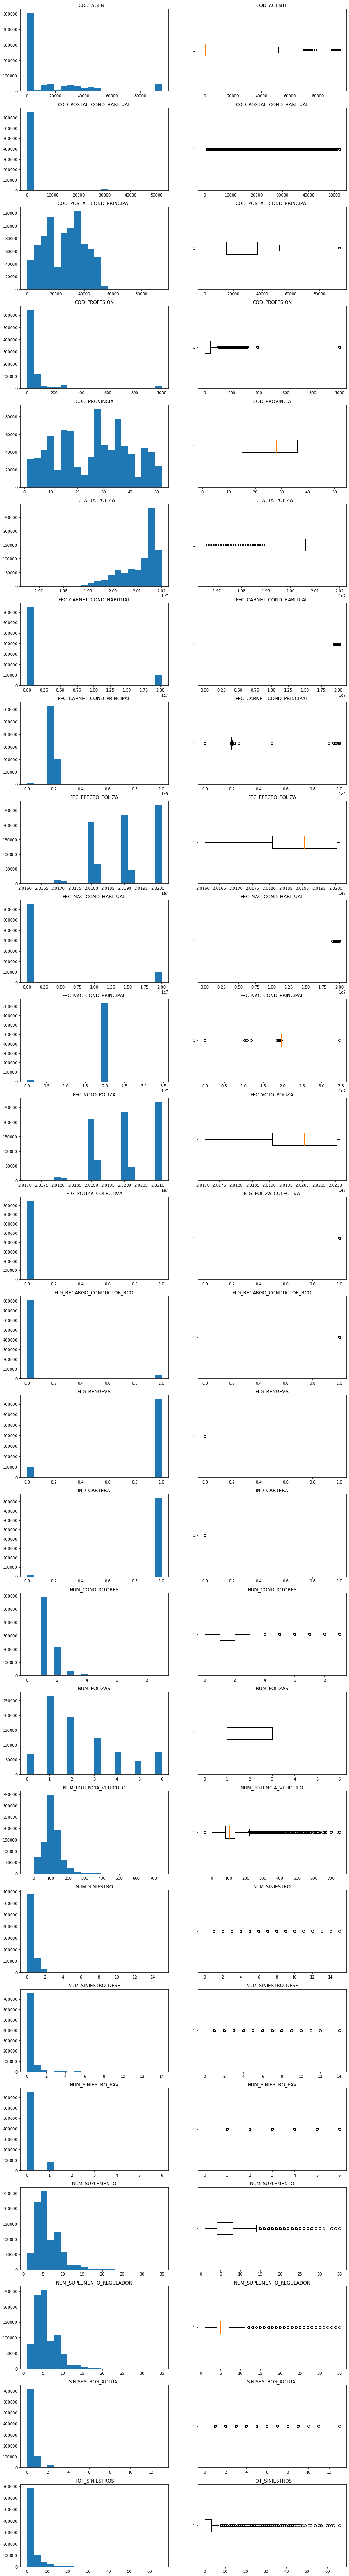

In [84]:
plt.figure(figsize=(15,500))
for i, var in enumerate(np.sort(df.describe().columns)):
    plt.subplot(df.columns.shape[0],2,2*i+1)
    plt.hist(df[var], bins = 20)
    plt.xlabel('')
    plt.title(var)
    plt.subplot(df.columns.shape[0],2,2*i+2)
    plt.boxplot(df[var], vert=False)
    plt.xlabel('')
    plt.title(var)

Saquemos información de estas visualizaciones:
* La columna COD_AGENTE la toma como numérica, pero solo tiene sentido como categórica. Veremos cuantos valores distintos toma.
* La columna COD_POSTAL_COND_HABITUAL está mayoritariamente vacía, podemos eliminarla.
* La columna COD_POSTAL_COND_PRINCIPAL también debería ser categórica. Habrá que ver si se deja tal cual, o se agrupa de alguna manera.
* El campo COD_PROVINCIA debe tomarse como categórico.
* El campo FEC_ALTA_POLIZA tiene un formato extraño. Nos conviene más usar el campo NUM_ANTIGUEDAD_POLIZA.
* El campo FEC_CARNET_COND_HABITUAL está mayoritariamente vacío, podemos eliminarlo.
* El campo FEC_CARNET_COND_PRINCIPAL tiene un formato extraño. Nos conviene más usar la columna NUM_ANTI_CARNET para tener la la información que queremos
* El campo FEC_NAC_COND_PRINCIPAL tiene un formato extraño. Nos conviene más usar la columna EDAD.
* El campo FEC_NAC_COND_HABITUAL está mayoritariamente vacío, podemos eliminarlo.
* El campo FLG_POLIZA_COLECTIVA está a cero en muchísimos casos
* El campo IND_CARTERA está casi siempre a 1.
* Del campo MES_CARTERA podemos extraer el mes, de tal manera que nos sea útil en años venideros TODO
* El campo NUM_POTENCIA_VEHICULO parece seguir una distribución logarítmica normal TODO confirmar este triplazo

In [85]:
df['COD_AGENTE'].nunique()

894

Hay 894 agentes distintos, esta categoría no nos vale para el estudio a realizar.

In [86]:
df.groupby(['IND_CARTERA', 'FLG_RENUEVA']).size()

IND_CARTERA  FLG_RENUEVA
0            0               10032
1            0               89739
             1              749435
dtype: int64

Parece que los campos que tienen IND_CARTERA no renuevan. Esta informaciñon no la tendremos en producción, hay que eliminarlo.

Eliminaremos los campos que hemos descartado tras las visualizaciones.

In [87]:
df = df.drop(columns=["COD_AGENTE","COD_POSTAL_COND_HABITUAL","FEC_ALTA_POLIZA","FEC_CARNET_COND_HABITUAL",
                      "FEC_CARNET_COND_PRINCIPAL", "FEC_NAC_COND_PRINCIPAL", "FEC_NAC_COND_HABITUAL","IND_CARTERA"])

### Variables categóricas

## Valores ausentes

## Relación entre las variables y el target

### Variables numéricas

### Variables categóricas

## Matriz de correlaciones

## Creación de variables nuevas

## Tratamiento de 'Outliers'

## Reducción de dimensionalidad

## Preparación de conjunto de datos para entrenamiento